# XBRAIN Demo Notebook

Last Update: 10/12/2017

In [30]:
# Imports 
import numpy as np
import scipy.io as sio
from PIL import Image
import ndparse as ndp
import xbrain
import time
import os

## Initialize
- Path of files
- Parameters for ilastik
- Parameters for cell detection
- Parameters for blood vessel segmentation

In [84]:
# Set folder where data is stored
current_dir = os.path.abspath(os.getcwd())
folder = next(os.walk('.'))[1][0]
#print(os.path.exists(folder)) # testing

# ilastik parameters
classifier_file = folder + '/xbrain_vessel_seg_v7.ilp'
#print(classifier_file)                 # testing
#print(os.path.exists(classifier_file)) # testing

# testing ground truth
image_file = folder + '/V3_imgdata_gt.npy'
#print(image_file)                 # testing
#print(os.path.exists(image_file)) # testing


# Dictate the processing power
ram_size = 4000 # 4000 MB                                                                            
no_of_threads = 8 # 8 threads

# Cell detection parameters                                                                         
cell_probability_threshold  = 0.2
stopping_criterion = 0.47
initial_template_size = 18
dilation_size = 8
max_no_cells = 500

# Vessel segmentation parameters                                                                    
vessel_probability_threshold = .68
dilation_size = 3
minimum_size = 4000

True
public_data/xbrain_vessel_seg_v7.ilp
True
public_data/V3_imgdata_gt.npy
True


## Load in the data

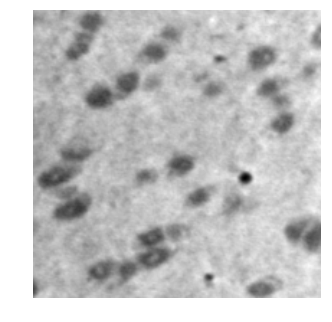

(200, 200, 200)


In [96]:
# load data
input_data = np.load(image_file)

# plot the 50th slice
ndp.plot(input_data, 50)

# get the shape of the data
print(input_data.shape) # (200, 200, 200)

## Ingest data and classifer into ilastik

In [87]:
# Compute time required for processing
start = time.time()

# Process the data to probability maps
probability_maps = xbrain.classify_pixel(input_data, classifier_file, threads=no_of_threads, ram=ram_size)

end = time.time()
print("\nElapsed time: %f minutes" % ((end - start)/60))

WARNING default_config.py(243): ResourceWarning: unclosed file <_io.TextIOWrapper name='/opt/conda/ilastik-meta/ilastik/ilastik/ilastik_logging/logging_config.json' mode='r' encoding='UTF-8'>


INFO ilastik_main: Starting ilastik from "/opt/conda".
INFO ilastik_main: Starting ilastik from "/opt/conda".
Starting ilastik from "/opt/conda".
INFO ilastik_main: Resetting lazyflow thread pool with 8 threads.
INFO ilastik_main: Resetting lazyflow thread pool with 8 threads.
INFO ilastik_main: Configuring lazyflow RAM limit to 3.9GiB
INFO ilastik_main: Configuring lazyflow RAM limit to 3.9GiB
INFO lazyflow.utility.memory: Available memory set to 3.9GiB
INFO lazyflow.utility.memory: Available memory set to 3.9GiB
INFO ilastik.shell.projectManager: Opening Project: public_data/xbrain_vessel_seg_v7.ilp
INFO ilastik.shell.projectManager: Opening Project: public_data/xbrain_vessel_seg_v7.ilp


WARNING bind.py(27): DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()


input_data.shape (200, 200, 200)
label_names, label_colors, probability_colors ['Background', 'Blood Vessel', 'Cell Body'] [(255, 0, 0), (0, 255, 0), (0, 0, 255)] [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
INFO ilastik.applets.batchProcessing.batchProcessingApplet: Exporting to in-memory array.
INFO ilastik.applets.batchProcessing.batchProcessingApplet: Exporting to in-memory array.
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per pixel is 216.0B * safety factor (2.0)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per pixel is 216.0B * safety factor (2.0)
INFO lazyflow.utility.bigRequestStreamer: determining blockshape assuming available_ram is 2.9GiB, split between 8 threads
INFO lazyflow.utility.bigRequestStreamer: determining blockshape assuming available_ram is 2.9GiB, split between 8 threads
INFO lazyflow.utility.bigRequestStreamer: Chose blockshape: (97, 97, 96, 3)
INFO lazyflow.utility.bigRequestStreamer: Chose blockshape: (97, 97, 96, 3)
INFO lazyfl

DEBUG lazyflow.operators.classifierOperators: Training: 27% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 28% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 28% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 28% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 28% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 29% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 29% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 29% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 29% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 29% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 29% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 30% (Computing features)
DEBUG lazyflow.operators.cla

DEBUG lazyflow.operators.classifierOperators: Training: 87% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 90% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 93% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 93% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 95% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 95% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 100% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 100% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training new classifier: Parallel Vigra Random Forest Factory (100 trees total)
DEBUG lazyflow.operators.classifierOperators: Training new classifier: Parallel Vigra Random Forest Factory (100 trees total)
INFO lazyflow.classifiers.parallelVigraRfLazyflowClassifier: Training took, 76.951454 seconds
INFO

DEBUG lazyflow.operators.classifierOperators: Features took 45.973719 seconds, Prediction took 80.184277 seconds for roi: [0, 97, 0, 0] : [97, 194, 96, 3]
DEBUG lazyflow.operators.classifierOperators: Features took 121.178586 seconds, Prediction took 2.972022 seconds for roi: [0, 97, 192, 0] : [97, 194, 200, 3]
DEBUG lazyflow.operators.classifierOperators: Features took 121.178586 seconds, Prediction took 2.972022 seconds for roi: [0, 97, 192, 0] : [97, 194, 200, 3]
DEBUG lazyflow.operators.classifierOperators: Features took 120.902669 seconds, Prediction took 2.9984070000000003 seconds for roi: [0, 194, 0, 0] : [97, 200, 96, 3]
DEBUG lazyflow.operators.classifierOperators: Features took 120.902669 seconds, Prediction took 2.9984070000000003 seconds for roi: [0, 194, 0, 0] : [97, 200, 96, 3]
DEBUG lazyflow.operators.classifierOperators: Features took 81.755613 seconds, Prediction took 45.021161 seconds for roi: [0, 97, 96, 0] : [97, 194, 192, 3]
DEBUG lazyflow.operators.classifierOpera

## Display the results of ilastik

cell_prob_map shape (200, 200, 200)


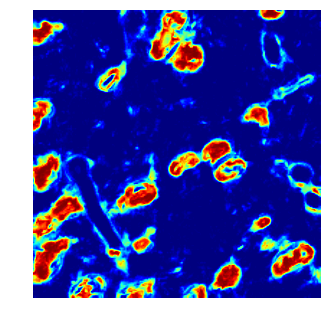

vessel_prob_map shape (200, 200, 200)


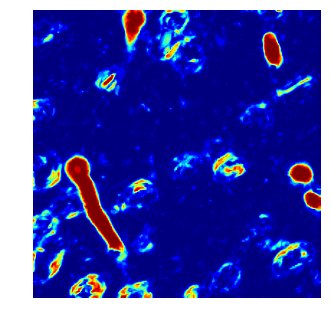

In [89]:
# pull down the coorisponding matricies
cell_prob_map = probability_maps[:, :, :, 2]
vessel_prob_map = probability_maps[:, :, :, 1]

print("cell_prob_map shape", cell_prob_map.shape)
ndp.plot(cell_prob_map, slice=50, cmap1='jet', alpha=0.5)


print("vessel_prob_map shape", vessel_prob_map.shape)
ndp.plot(vessel_prob_map, slice=50, cmap1='jet')


## Running different package for testing new algorithm

In [90]:
# reload packages for testing new algorithms
# import importlib
# importlib.reload(xbrain)

# Compute time required for processing
start = time.time()

# cell detection
centroids, cell_map = xbrain.detect_cells(cell_prob_map, cell_probability_threshold, stopping_criterion, initial_template_size, dilation_size, max_no_cells)
print(centroids)

end = time.time()
print("\nElapsed time: %f minutes" % ((end - start)/60))

WARNING _bootstrap.py(205): ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__


Iteration remaining =  499 Correlation =  [[ 0.95168388]]
Iteration remaining =  489 Correlation =  [[ 0.91369426]]
Iteration remaining =  479 Correlation =  [[ 0.88610667]]
Iteration remaining =  469 Correlation =  [[ 0.86151671]]
Iteration remaining =  459 Correlation =  [[ 0.85078424]]
Iteration remaining =  449 Correlation =  [[ 0.84014732]]
Iteration remaining =  439 Correlation =  [[ 0.82743627]]
Iteration remaining =  429 Correlation =  [[ 0.81597131]]
Iteration remaining =  419 Correlation =  [[ 0.80801356]]
Iteration remaining =  409 Correlation =  [[ 0.79984474]]
Iteration remaining =  399 Correlation =  [[ 0.78171575]]
Iteration remaining =  389 Correlation =  [[ 0.76294184]]
Iteration remaining =  379 Correlation =  [[ 0.74776268]]
Iteration remaining =  369 Correlation =  [[ 0.72482878]]
Iteration remaining =  359 Correlation =  [[ 0.70334792]]
Iteration remaining =  349 Correlation =  [[ 0.69173962]]
Iteration remaining =  339 Correlation =  [[ 0.67132163]]
Iteration rema

In [91]:
# find vessels

vessel_map = xbrain.segment_vessels(vessel_prob_map, vessel_probability_threshold, dilation_size, minimum_size)

## Display results of new algorithm

WARNING assess.py(299): MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
WARNING __init__.py(917): UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
WARNING rcsetup.py(152): UserWarning: axes.hold is deprecated, will be removed in 3.0


Vessel Segmentation


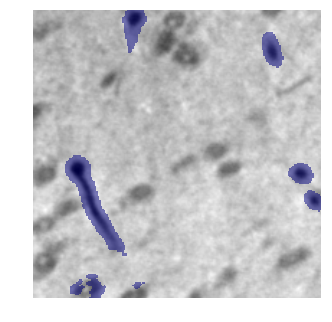

Cell Segmentation


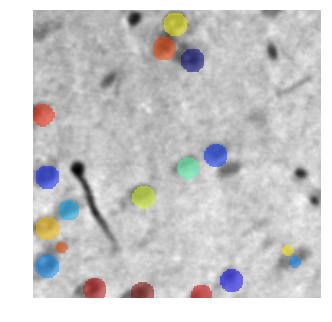

In [95]:
# show results

print("Vessel Segmentation")
ndp.plot(input_data, vessel_map, slice = 50, alpha = 0.5)

print("Cell Segmentation")
ndp.plot(input_data, cell_map, slice = 50, alpha = 0.5)


#### Thank you for going throught the XBRAIN tutorial!  For more information about the lab, please visit: [dyerlab.gatech.edu](http://dyerlab.gatech.edu)